# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [1]:
# TODO: code and runtime results
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To display atmost 1000 rows 
pd.options.display.max_rows=1000

In [2]:
# *********** LOADING DATA FILES ******************
#importing train_transaction.csv file
train_trans= pd.read_csv('train_transaction.csv')

#importing train_identity.csv file
train_id= pd.read_csv('train_identity.csv')

#creating a transaction dataframe with required columns only
df_trans = train_trans[['TransactionID','TransactionDT','TransactionAmt',
                'ProductCD','card4','card6','P_emaildomain',
                'R_emaildomain','addr1','addr2','dist1','dist2','isFraud']]

#creating an identity dataframe with required columns only
df_identity = train_id[['TransactionID','DeviceType','DeviceInfo']]

#merging modified transaction and identity dataframe based on the TransactionID
combined_df = pd.merge(df_trans,df_identity,how='outer',on='TransactionID')

#replace NAN with appropriate values in combined data frame
set1 = ["addr1","addr2","dist1","dist2"]
set2 = ["card4","card6",'P_emaildomain','R_emaildomain','DeviceType','DeviceInfo']
combined_df[set1] = combined_df[set1].replace({np.nan:-9999})
combined_df[set2] = combined_df[set2].replace({np.nan:'unknown'})

In [8]:
# *********** CHECKING DATA ******************
print('Size of data:',combined_df.size,combined_df.shape)
print('*'*70)
print('Null values:',combined_df.isna().sum())
print('*'*70)
print(combined_df.describe())
print('*'*70)
print('# of duplicated rows',combined_df.duplicated().sum())
print('*'*70)
combined_df.head()

Size of data: 8858100 (590540, 15)
**********************************************************************
Null values: TransactionID     0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card4             0
card6             0
P_emaildomain     0
R_emaildomain     0
addr1             0
addr2             0
dist1             0
dist2             0
isFraud           0
DeviceType        0
DeviceInfo        0
dtype: int64
**********************************************************************
       TransactionID  TransactionDT  TransactionAmt          addr1  \
count   5.905400e+05   5.905400e+05   590540.000000  590540.000000   
mean    3.282270e+06   7.372311e+06      135.027176    -854.145890   
std     1.704744e+05   4.617224e+06      239.162522    3237.124485   
min     2.987000e+06   8.640000e+04        0.251000   -9999.000000   
25%     3.134635e+06   3.027058e+06       43.321000     184.000000   
50%     3.282270e+06   7.306528e+06       68.769000     272.000000   
75%    

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,isFraud,DeviceType,DeviceInfo
0,2987000,86400,68.5,W,discover,credit,unknown,unknown,315.0,87.0,19.0,-9999.0,0,unknown,unknown
1,2987001,86401,29.0,W,mastercard,credit,gmail.com,unknown,325.0,87.0,-9999.0,-9999.0,0,unknown,unknown
2,2987002,86469,59.0,W,visa,debit,outlook.com,unknown,330.0,87.0,287.0,-9999.0,0,unknown,unknown
3,2987003,86499,50.0,W,mastercard,debit,yahoo.com,unknown,476.0,87.0,-9999.0,-9999.0,0,unknown,unknown
4,2987004,86506,50.0,H,mastercard,credit,gmail.com,unknown,420.0,87.0,-9999.0,-9999.0,0,mobile,SAMSUNG SM-G892A Build/NRD90M


In [4]:
#Creating a dataframe with isFraud value as 1
isFraud_True=combined_df[combined_df['isFraud'] == 1]

#Creating a dataframe with isFraud value as 0
isFraud_False=combined_df.loc[combined_df['isFraud'] == 0]

(0, 600)

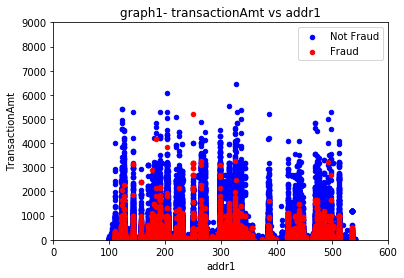

In [5]:
#Creating scatter plot for non fraud and fraud transactions using addr1 and TransactionAmt on x and y axis respectively
ax=isFraud_False.plot(kind='scatter',y='TransactionAmt',x='addr1',label='Not Fraud',color='blue')
isFraud_True.reset_index().plot(kind='scatter', y='TransactionAmt', x='addr1',
                                          color='red', label='Fraud', ax=ax)
ax.set_title("graph1- transactionAmt vs addr1")
ax.set_ylim((0, 9000))
ax.set_xlim((0, 600))

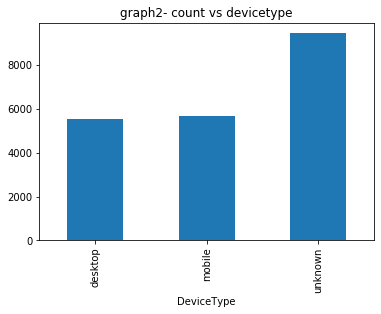

In [6]:
#creating bar graphs for device type vs count of the device type 
isFraud_True.groupby('DeviceType')['DeviceType'].count().plot(kind='bar',title='graph2- count vs devicetype')
plt.show()


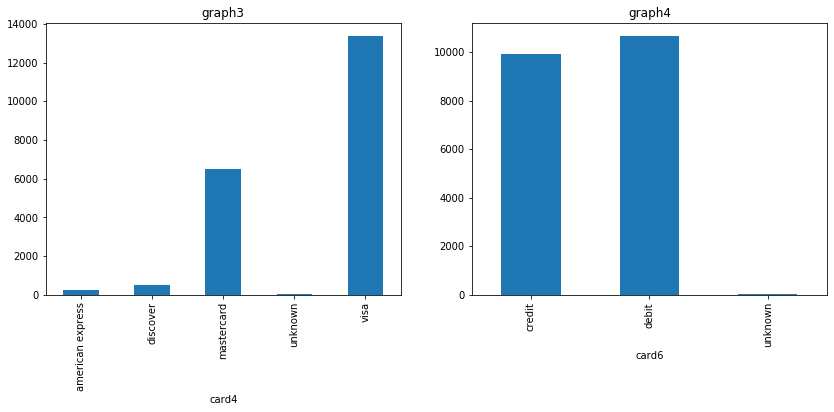

In [7]:
#creating bar graphs for card4 and card6 vs count 
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
isFraud_True.groupby('card4')['card4'].count().plot(ax=ax1,kind='bar',title='graph3')
isFraud_True.groupby('card6')['card6'].count().plot(kind='bar',title='graph4')
plt.show()

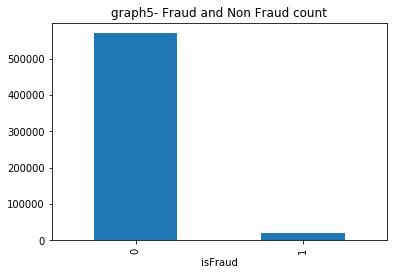

In [8]:
#creating bar graphs for fraud and non fraud transactions
combined_df.groupby('isFraud')['isFraud'].count().plot(kind='bar',title='graph5- Fraud and Non Fraud count')
plt.show()

According to the graph1, considering only the addr1 as the location we can notice that the fraudulent transactions are made for  lower transaction amounts compared to the genuine transactions.From graph2, it is evident that the fraud transactions are slightly more for mobiles on comparison with desktop. From graph3, we see that fraudulent transactions are made more using the visa card. From graph4, we notice that fraudulent transactions are made more using credit card. Another interesting observation is that the fraudulent transactions are much less in number (from graph5)

## Part 2 - Transaction Frequency

In [9]:
# TODO: code to generate the frequency graph

#  Finding the units of 'TransactionDT'
print('Time difference:',combined_df['TransactionDT'].max()-combined_df['TransactionDT'].min())
print('Time difference:',(combined_df['TransactionDT'].max()-combined_df['TransactionDT'].min())/(60*60*24))

# We can assume the data to be in second and can capture data between ~182 days.
# Creating day column
combined_df['day'] = (combined_df['TransactionDT']//(60*60*24)-1)%7
#Creating hour column
combined_df['hour'] = (combined_df['TransactionDT']//(60*60))%24

Time difference: 15724731
Time difference: 181.99920138888888


The most frequent countries are: [   87. -9999.    60.    96.    32.]
**********************************graph1- frequency vs addr2*****************************


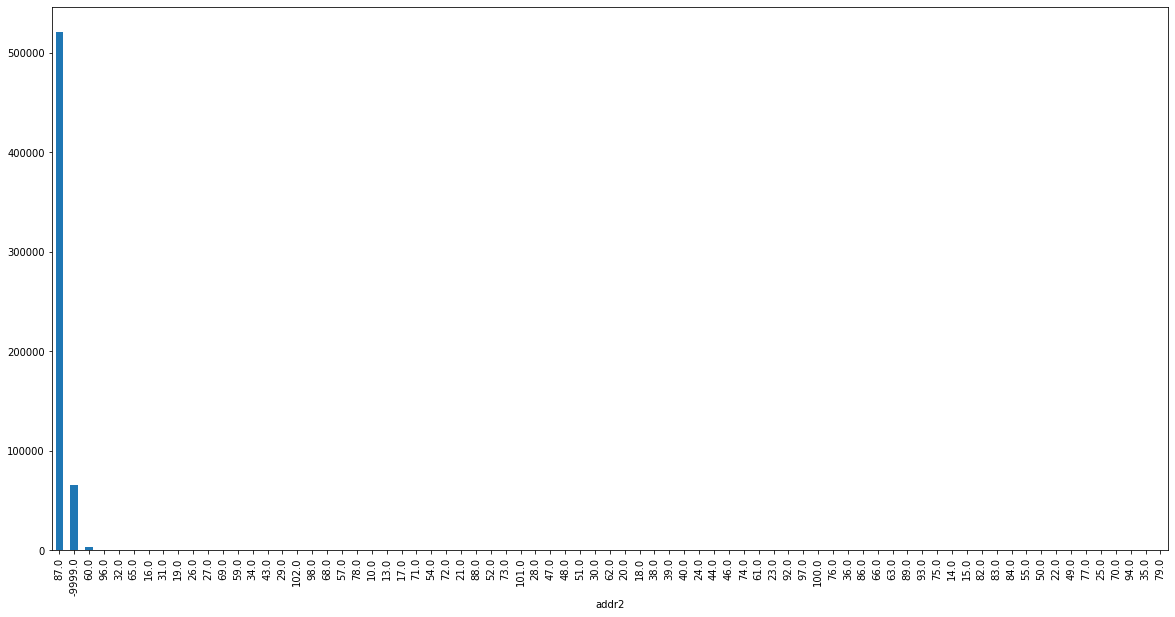

In [10]:
# Distibution of total transactions
fig = plt.figure(figsize=(20,10))

combined_df.groupby('addr2')['day'].count().sort_values(ascending=False).plot(kind='bar')
freq_countries_list = combined_df.groupby('addr2')['day'].count().sort_values(ascending=False).head().index.values

print('The most frequent countries are:',freq_countries_list)

print('**********************************graph1- frequency vs addr2*****************************')

**********************************graph2*****************************


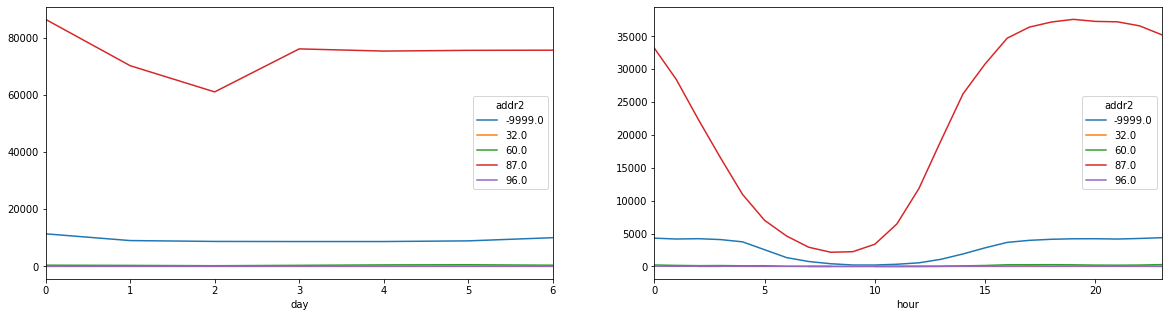

In [11]:
# Distibution of transactions for most frequent countries.

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

freq_countries = combined_df[combined_df['addr2'].isin(list(freq_countries_list))]

freq_countries.groupby(['day','addr2']).count()['TransactionAmt'].unstack().plot(ax=ax1)
freq_countries.groupby(['hour','addr2']).count()['TransactionAmt'].unstack().plot(ax=ax2)
print('**********************************graph2*****************************')
plt.show()

plt.show()

**********************************graph3*****************************


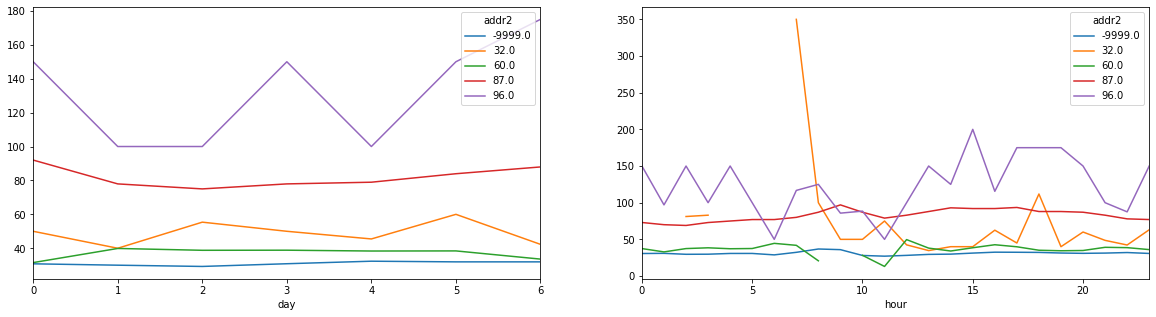

In [12]:
# Distibution of transctions for most frequent countries with amount.

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fre_countries = combined_df[combined_df['addr2'].isin(list(freq_countries_list))]

fre_countries.groupby(['day','addr2']).median()['TransactionAmt'].unstack().plot(ax=ax1)
fre_countries.groupby(['hour','addr2']).median()['TransactionAmt'].unstack().plot(ax=ax2)
print('**********************************graph3*****************************')
plt.show()

plt.show()

**********************************graph4- addr2 vs hour**************************************


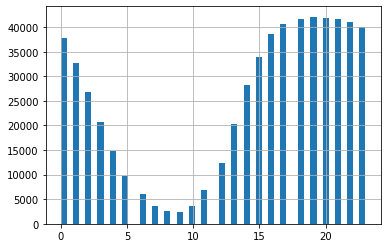

In [14]:

#histograms for hour vs frequency
hr_df=combined_df.filter(['hour','addr2'])
hr_df['hour'].hist(bins=50)
print('**********************************graph4- addr2 vs hour**************************************')

'graph5- Frequency distribution of transactions by time for the most frequent country code '

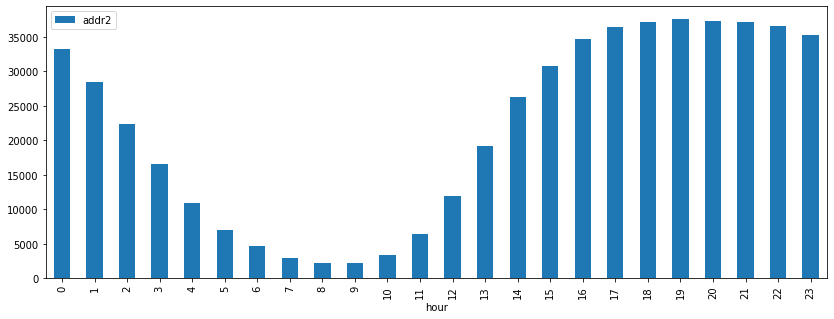

In [19]:
#Frequency distribution of transactions by time for the most frequent country code
freq_addr=hr_df['addr2'].value_counts().idxmax()

#creating a  data frame based on most frequent address
freq_df=hr_df.loc[hr_df['addr2'] == freq_addr]
freq_df.groupby('hour').count().plot(kind='bar',legend=True,label='Most Frequent Address vs time',figsize=(14,5))
'''graph5- Frequency distribution of transactions by time for the most frequent country code '''


From graph1, we find that the most frequent country code is 87. From graph5, we see that the most active hours are from 14:00 to 19:00 since the transaction activity is increasing steadily. So this is the waking hours of the most frequent country code. We see that transaction activity at 19:00 is the highest and it slowly starts decreasing. The graph resembles a sine wave. 

## Part 3 - Product Code

In [15]:
# TODO: code to analyze prices for different product codes

In [15]:
combined_df.groupby('ProductCD')['TransactionAmt'].describe()

,count,mean,std,min,25%,50%,75%,max
ProductCD,,,,,,,,
C,68519.0,42.872353,38.943070,0.251,18.423,31.191,54.102,712.896
H,33024.0,73.170058,61.950955,15.000,35.000,50.000,100.000,500.000
R,37699.0,168.306188,142.035568,25.000,100.000,125.000,200.000,1800.000
S,11628.0,60.269487,80.546775,5.000,20.000,35.000,80.000,1550.000
W,439670.0,153.158554,268.733692,1.000,49.000,78.500,146.000,31937.391


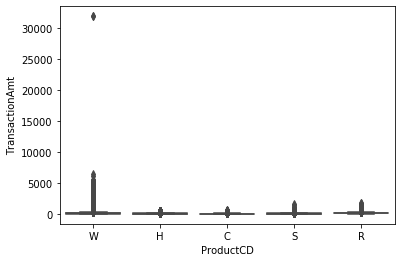

In [16]:
#Creating a boxplot for TransactionAmt vs ProductCD
s = sns.boxplot( x="ProductCD", y="TransactionAmt",data=combined_df, palette="Set1",showfliers=True)

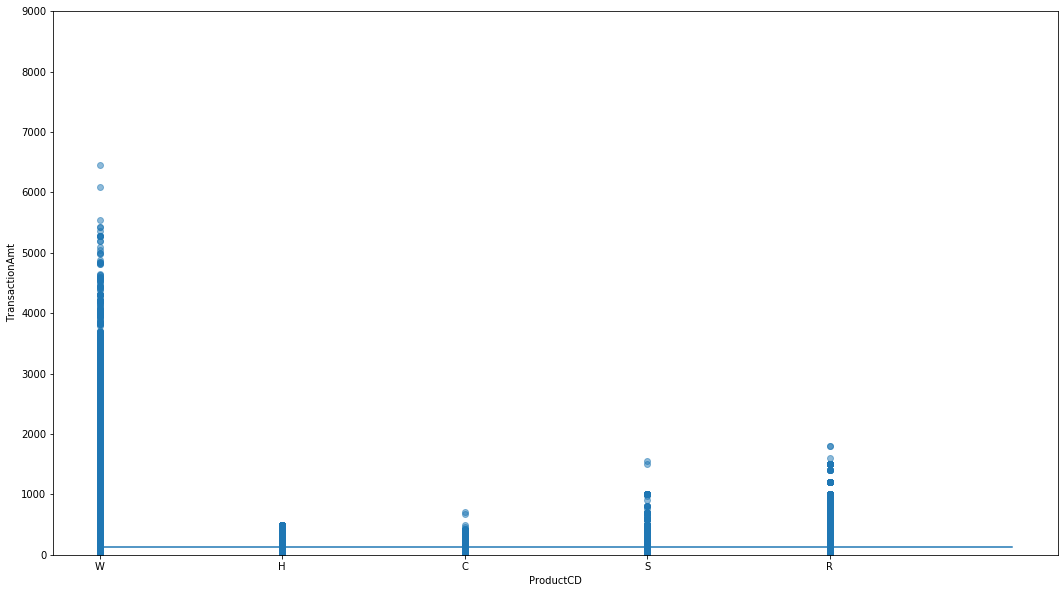

In [17]:
amt_mean=combined_df['TransactionAmt'].mean()
x= combined_df['ProductCD']
y= combined_df['TransactionAmt']
plt.figure(figsize=(18,10))
plt.scatter(x, y, alpha=0.5)
plt.plot([0, 5], [amt_mean, amt_mean])
plt.ylim(0, 9000)
plt.xlabel('ProductCD')
plt.ylabel('TransactionAmt')
plt.show()

From the boxplots for all the productCD, we see that the Product Code W corresponds with the highest transaction amount and H corresponds with the lowest transaction amount. Hence, W corresponds with the most expensive products and H with the cheapest products.

## Part 4 - Correlation Coefficient

**********correlation coefficient*********
                    hour  TransactionAmt
hour            1.000000        0.642117
TransactionAmt  0.642117        1.000000


Text(0.5, 1.0, 'distribution of time of day and purchase amount')

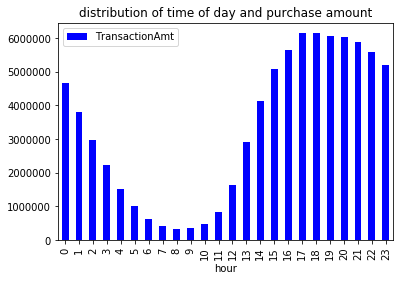

In [18]:
# TODO: code to calculate correlation coefficient

#filtering out the merged dataset with transaction amount and hours as columns
time_df=combined_df.filter(['TransactionAmt','hour'])
sum_df=time_df.groupby('hour').sum().reset_index()

#printing the correlation matrix
print('**********correlation coefficient*********')
print(sum_df.corr())

#plotting bar graph of distribution of time of day and purchase amount
time_amt=sum_df.plot(kind='bar',y='TransactionAmt',x='hour',color='blue')
time_amt.set_title("distribution of time of day and purchase amount")

The correlation of time of the day to purchase amount is  0.642117

## Part 5 - Interesting Plot

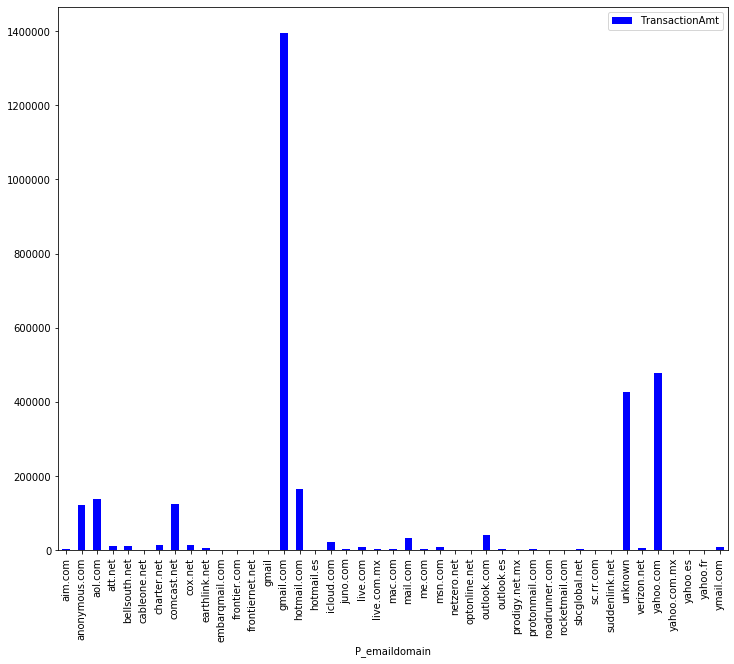

In [26]:

#filtering out the merged dataset with transaction amount and hours as columns
email_df=isFraud_True.filter(['P_emaildomain','TransactionAmt'])
#sum_df=card_df.groupby('card4').sum().reset_index()
email_df.describe
emaildomain_df=email_df.groupby('P_emaildomain').sum().reset_index()
graph=emaildomain_df.plot(kind='bar',y='TransactionAmt',x='P_emaildomain',color='blue', figsize=(12,10))

From this graph, we can deduce that among the fraudulent transactions, gmail.com corresponds with highest transaction amount. This is followed by yahoo.com. Interesting thing that can be noticed over here is that a lot of transactions have NAN as P_emaildomain which is also the third highest in the bar graph plotted above

## Part 6 - Prediction Model

In [27]:
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor


In [28]:
train_trans= pd.read_csv('train_transaction.csv')
train_id= pd.read_csv('train_identity.csv')

#merging transaction and identity data frames
final_df = pd.merge(train_trans,train_id,how='outer',on='TransactionID')

# *********** CHECKING DATA ******************
print('Size of data:',final_df.size,final_df.shape)
print('*'*70)
print('Null values:',final_df.isna().sum())
print('*'*70)
print(final_df.describe())
print('*'*70)
print('# of duplicated rows',final_df.duplicated().sum())
print('*'*70)
final_df.head()

Size of data: 256294360 (590540, 434)
**********************************************************************
Null values: TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5 

       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000    

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [29]:
#filtering out final merged data frame by using only certain columns
cols = ['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','R_emaildomain','M1',
                 'M2','M3','M4','M5','M6','M7','M8','M9','DeviceType','DeviceInfo','id_12','id_13', 
                 'id_14','id_15','id_16','id_17','id_18','id_19','id_20','id_21','id_22','id_23',
                  'id_24','id_25','id_26','id_27','id_28','id_29','id_30','id_31',
                  'id_32','id_33','id_34','id_35','id_36','id_37','id_38','TransactionDT','TransactionAmt','isFraud','TransactionID','C1','C2','C3']

final_df=final_df.filter(cols)


In [30]:
print('Null values:',final_df.isna().sum())

Null values: ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
P_emaildomain      94456
R_emaildomain     453249
M1                271100
M2                271100
M3                271100
M4                281444
M5                350482
M6                169360
M7                346265
M8                346252
M9                346252
DeviceType        449730
DeviceInfo        471874
id_12             446307
id_13             463220
id_14             510496
id_15             449555
id_16             461200
id_17             451171
id_18             545427
id_19             451222
id_20             451279
id_21             585381
id_22             585371
id_23             585371
id_24             585793
id_25             585408
id_26             585377
id_27             585371
id_28             449562
id_29       

In [31]:

numeric_cols=['card2','card3','card5','addr1','addr2','id_13','id_14','id_17','id_18','id_19','id_20','id_21','id_22','id_24','id_25','id_26','id_32','C1','C2','C3']




In [32]:
#replacing numeric columns with mean
for x in numeric_cols:
 final_df[x].fillna((final_df[x].mean()), inplace=True)


In [33]:
str_cols=['card4','card6','P_emaildomain','R_emaildomain','id_15','id_16','id_23','id_27','id_28','id_29','id_30','id_31','id_33','id_34','id_35','id_36','id_37','id_38','DeviceType','DeviceInfo']

In [35]:
#replacing other columns with "no record"
for x in str_cols:
 final_df[x].fillna("no record", inplace=True)

In [36]:
fin_cols = ['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','R_emaildomain','M1',
                 'M2','M3','M4','M5','M6','M7','M8','M9','DeviceType','DeviceInfo','id_12','id_13', 
                 'id_14','id_15','id_16','id_17','id_18','id_19','id_20','id_21','id_22','id_23',
                  'id_24','id_25','id_26','id_27','id_28','id_29','id_30','id_31',
                  'id_32','id_33','id_34','id_35','id_36','id_37','id_38','TransactionDT','TransactionAmt','TransactionID','C1','C2','C3']

enc = ['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','R_emaildomain','M1',
                 'M2','M3','M4','M5','M6','M7','M8','M9','DeviceType','DeviceInfo','id_12','id_13', 
                 'id_14','id_15','id_16','id_17','id_18','id_19','id_20','id_21','id_22','id_23',
                  'id_24','id_25','id_26','id_27','id_28','id_29','id_30','id_31',
                  'id_32','id_33','id_34','id_35','id_36','id_37','id_38','C1','C2','C3']

In [37]:
#create label encoders for categorical features
for x in enc:
 labelenc = LabelEncoder()
 final_df[x] = labelenc.fit_transform(final_df[x].astype('str'))



In [38]:
final_df['TransactionDT']=(final_df['TransactionDT']//(60*60))%24

In [39]:
#importing test_identity.csv file
test_id= pd.read_csv('test_identity.csv')

#importing test_transaction.csv file
test_trans= pd.read_csv('test_transaction.csv')


In [40]:
#have two data sets now :Combine test_trans and test_id with transactionID as commmon
test_final=pd.merge(test_trans,test_id,how='outer',on='TransactionID')
test_final=test_final.filter(fin_cols)
#clean data

#replacing numeric columns with mean
for x in numeric_cols:
 test_final[x].fillna((test_final[x].mean()), inplace=True)


for x in str_cols:
 test_final[x].fillna("no record", inplace=True)

#create label encoders for categorical features
for x in enc:
 labelenc = LabelEncoder()
 test_final[x] = labelenc.fit_transform(test_final[x].astype('str'))


#merged data frame; change dt to hourly range
test_final['TransactionDT']=pd.to_datetime(test_final['TransactionDT'],unit='s')
test_final['TransactionDT']=test_final['TransactionDT'].dt.hour



In [41]:
y=final_df.isFraud.copy()
X=final_df.drop('isFraud', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
# KNN
# classifier = KNeighborsClassifier(n_neighbors=5)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
# pr1 = classifier.predict(test_final)

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
confmatrix = metrics.confusion_matrix(y_test, y_pred)
print(confmatrix)

[[170921    120]
 [  3265   2856]]


In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#using the test data to predict isFraud
pr1 = classifier.predict(test_final)

Accuracy: 0.9808931938000248


In [45]:
out=pd.DataFrame(pr1,test_final.TransactionID,['isFraud'])
out.to_csv('out.csv')

Training dataset for transaction and identity are merged to form final dataframe. This data frame is filtered out by only considering few columns which would be relevant for prediction. After this the dataset is cleaned by replacing NANs with appropriate values in numerical as well object columns. Label encoders are used for all the columns. Test data is also cleaned and irrelevant columns are removed. Random forest classifier is used to predict the isFraud for test dataset. Accuracy is 0.98

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/aishwaryavhs07

Highest Rank: 5681

Score: 0.6020

Number of entries: 5

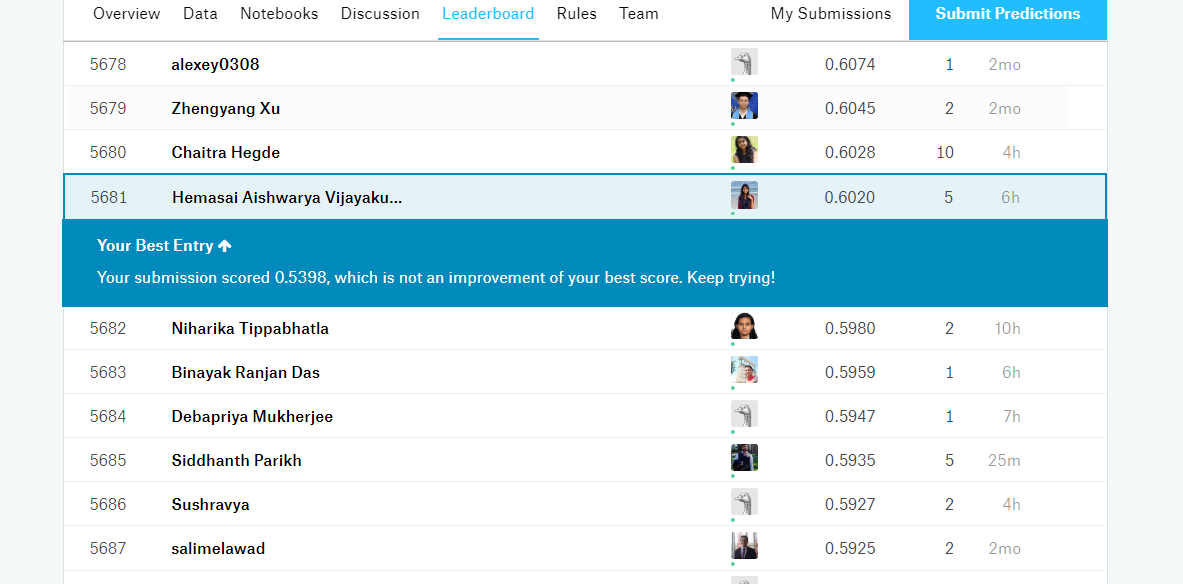